In [16]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

print("Done importing")

Done importing


In [17]:
X_train = pd.read_csv("data/X_train.csv")
X_test = pd.read_csv("data/X_test.csv")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (242, 22)
X_test shape: (61, 22)


In [18]:
y_train = pd.read_csv("data/y_train.csv")
y_test = pd.read_csv("data/y_test.csv")
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (242, 1)
y_test shape: (61, 1)


In [19]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Done Scaling")

Done Scaling


In [24]:
# Train baseline with logistic Regression
baseline = LogisticRegression(random_state=12)
baseline.fit(X_train_scaled, y_train)

C:\Users\DELL\PycharmProjects\heart_disease_prediction\venv\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,12
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [25]:
# Evaluate models
y_pred = baseline.predict(X_test_scaled)
y_pred_proba = baseline.predict_proba(X_test_scaled)[:, 1]

print("Baseline Model Performance:")
print(classification_report(y_test, y_pred))
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba):.3f}")

Baseline Model Performance:
              precision    recall  f1-score   support

           0       0.78      0.88      0.83        33
           1       0.83      0.71      0.77        28

    accuracy                           0.80        61
   macro avg       0.81      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61

ROC-AUC: 0.899


In [26]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import xgboost as xgb

print("Done importing")

Done importing


In [30]:
# define a dictionary of each models stored for comparison
# create a function that train and evaluate all models
models = {
    "Logistic Regression": LogisticRegression(random_state=12),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=12),
    "Gradient Boosting": GradientBoostingClassifier(random_state=12),
    "XGBoost": xgb.XGBClassifier(
        random_state=12, use_label_encoder=False, eval_metric="logloss"
    ),
    "SVM": SVC(probability=True, random_state=12),
}
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    auc = roc_auc_score(y_test, y_pred_proba)
    results[name] = auc
    print(f"{name}: AUC = {auc:.3f}")

# Select best model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name}")

C:\Users\DELL\PycharmProjects\heart_disease_prediction\venv\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\PycharmProjects\heart_disease_prediction\venv\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Logistic Regression: AUC = 0.899
Random Forest: AUC = 0.903


C:\Users\DELL\PycharmProjects\heart_disease_prediction\venv\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boosting: AUC = 0.868
XGBoost: AUC = 0.873
SVM: AUC = 0.856

Best Model: Random Forest


C:\Users\DELL\PycharmProjects\heart_disease_prediction\venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [14:25:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\DELL\PycharmProjects\heart_disease_prediction\venv\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [33]:
from sklearn.model_selection import GridSearchCV

# Performing Hyperparameter Tuning on the best model (Random Forest)
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [5, 10, 15, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=12),
    param_grid,
    cv=5,
    scoring="roc_auc",
    n_jobs=-1,
)

grid_search.fit(X_train_scaled, y_train)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best CV AUC: {grid_search.best_score_:.3f}")

# Final model
final_model = grid_search.best_estimator_

C:\Users\DELL\PycharmProjects\heart_disease_prediction\venv\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best CV AUC: 0.914


In [34]:
import shap

# I want to get the feature importances
importances = final_model.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame(
    {"feature": feature_names, "importance": importances}
).sort_values("importance", ascending=False)

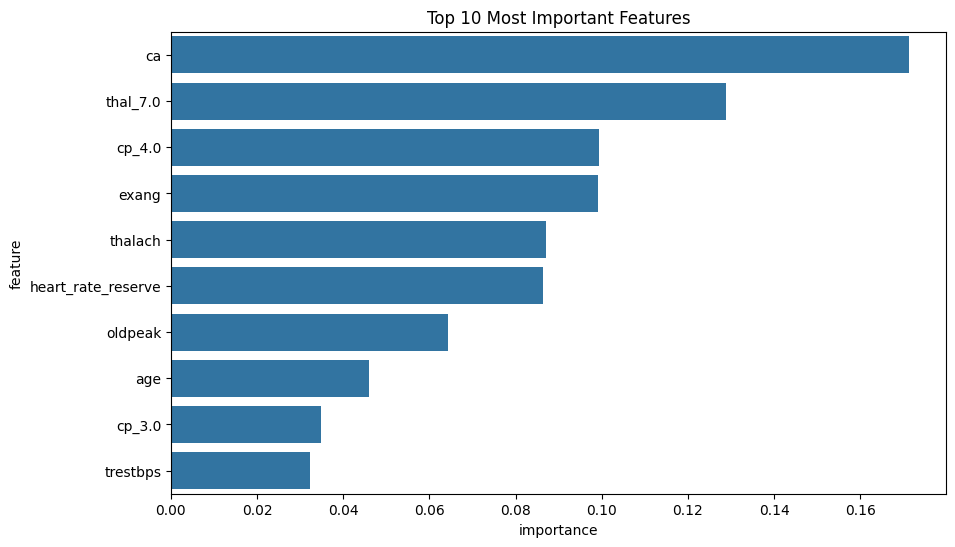

<Figure size 640x480 with 0 Axes>

In [36]:
# Visualization of the top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df.head(10), x="importance", y="feature")
plt.title("Top 10 Most Important Features")
plt.show()
plt.savefig("reports/feature_importance.png")

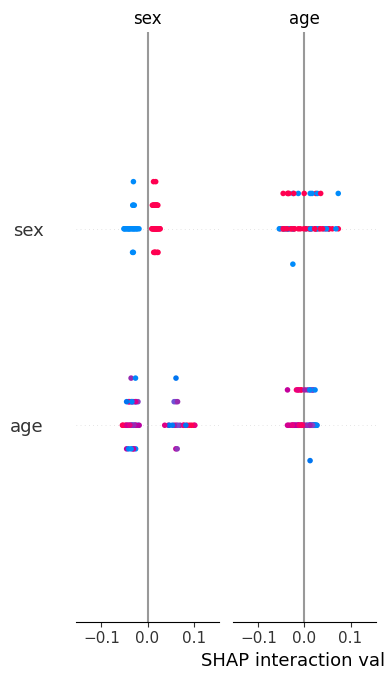

In [43]:
# SHAP values for model interpretability
explainer = shap.TreeExplainer(final_model)
shap_values = explainer.shap_values(X_test_scaled)

# Summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
plt.savefig("reports/shap_summary.png")

In [57]:
import joblib

# Save complete pipeline
pipeline_artifacts = {
    "scaler": scaler,
    "model": final_model,
    "feature_names": X_train.columns.tolist(),
}

joblib.dump(pipeline_artifacts, "models/heart_disease_model.pkl")
print("Model saved successfully")

Model saved successfully


In [66]:
def predict_heart_disease(patient_data):
    """
    Predict heart disease risk for a new patient.

    Args:
        patient_data: dict with patient features (raw)
    Returns:
        dict with prediction, risk score, and recommendation
    """
    # Load trained model artifacts
    artifacts = joblib.load("models/heart_disease_model.pkl")
    scaler = artifacts["scaler"]
    model = artifacts["model"]
    feature_names = artifacts["feature_names"]  # expected features

    # Convert input to DataFrame
    df = pd.DataFrame([patient_data])

    # Feature engineering (same as training)
    df["age_group"] = pd.cut(df["age"], bins=[0, 40, 55, 70, 100], labels=[0, 1, 2, 3])
    df["chol_risk"] = (df["chol"] > 240).astype(int)
    df["bp_risk"] = (df["trestbps"] > 140).astype(int)
    df["heart_rate_reserve"] = 220 - df["age"] - df["thalach"]

    # One-hot encode categorical variables
    df_encoded = pd.get_dummies(
        df, columns=["cp", "restecg", "slope", "thal"], drop_first=True
    )

    # Ensure all model features exist
    for col in feature_names:
        if col not in df_encoded.columns:
            df_encoded[col] = 0

    # Reorder columns to match training
    df_encoded = df_encoded[feature_names]

    # Scale features
    input_scaled = scaler.transform(df_encoded)

    # Make prediction
    prediction = model.predict(input_scaled)[0]
    probability = model.predict_proba(input_scaled)[0][1]

    return {
        "prediction": "Disease Detected" if prediction == 1 else "Healthy",
        "risk_score": f"{probability*100:.1f}%",
        "recommendation": (
            "Consult a cardiologist immediately"
            if probability > 0.7
            else "Routine checkup recommended"
        ),
    }


# Example usage
test_patient = {
    "age": 65,
    "sex": 1,
    "cp": 4,
    "trestbps": 260,
    "chol": 280,
    "fbs": 1,
    "restecg": 2,
    "thalach": 180,
    "exang": 1,
    "oldpeak": 2.5,
    "slope": 2,
    "ca": 2,
    "thal": 6,
}

result = predict_heart_disease(test_patient)
print(result)

{'prediction': 'Disease Detected', 'risk_score': '56.1%', 'recommendation': 'Routine checkup recommended'}


In [67]:
test_patient2 = {
    "age": 45,
    "sex": 0,
    "cp": 2,
    "trestbps": 130,
    "chol": 220,
    "fbs": 0,
    "restecg": 1,
    "thalach": 170,
    "exang": 0,
    "oldpeak": 1.0,
    "slope": 1,
    "ca": 0,
    "thal": 2,
}
result = predict_heart_disease(test_patient2)
print(result)

{'prediction': 'Healthy', 'risk_score': '5.2%', 'recommendation': 'Routine checkup recommended'}


In [69]:
test_patient3 = {
    "age": 62,
    "sex": 1,
    "cp": 4,
    "trestbps": 160,
    "chol": 280,
    "fbs": 1,
    "restecg": 1,
    "thalach": 130,
    "exang": 1,
    "oldpeak": 3.0,
    "slope": 2,
    "ca": 2,
    "thal": 3,
}
result = predict_heart_disease(test_patient3)
print(result)

{'prediction': 'Disease Detected', 'risk_score': '75.3%', 'recommendation': 'Consult a cardiologist immediately'}
